In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## Data Exploration

In [3]:
print 'train shape',train.shape
print 'test shape',test.shape

train shape (614, 13)
test shape (367, 12)


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
120,LP001627,Male,No,0,Graduate,No,3125,0,65.0,360.0,1.0,Urban


In [6]:
sample.head()

,Loan_ID,Loan_Status


In [7]:
print 'unique Loan_ID', len(train.Loan_ID.unique())

unique Loan_ID 614


In [8]:
for col in train.columns:
    print train[col].describe()

count          614
unique         614
top       LP001888
freq             1
Name: Loan_ID, dtype: object
count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
count 

### Check whether imbalanced class 

In [9]:
print train.Loan_Status.value_counts()/614*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


### Plot Categorical Columns

In [10]:
categ_cols = [col for col in train.columns if train[col].dtype == 'object']
print len(categ_cols)

8


In [11]:
#Remove Loan_Status
categ_cols.pop()

'Loan_Status'

In [12]:
fig, ax = plt.subplots(figsize=(7,20), nrows=len(categ_cols), sharex=False)

In [13]:
for i in range(7):
    sns.countplot(categ_cols[i], data=train, hue='Loan_Status', ax=ax[i])

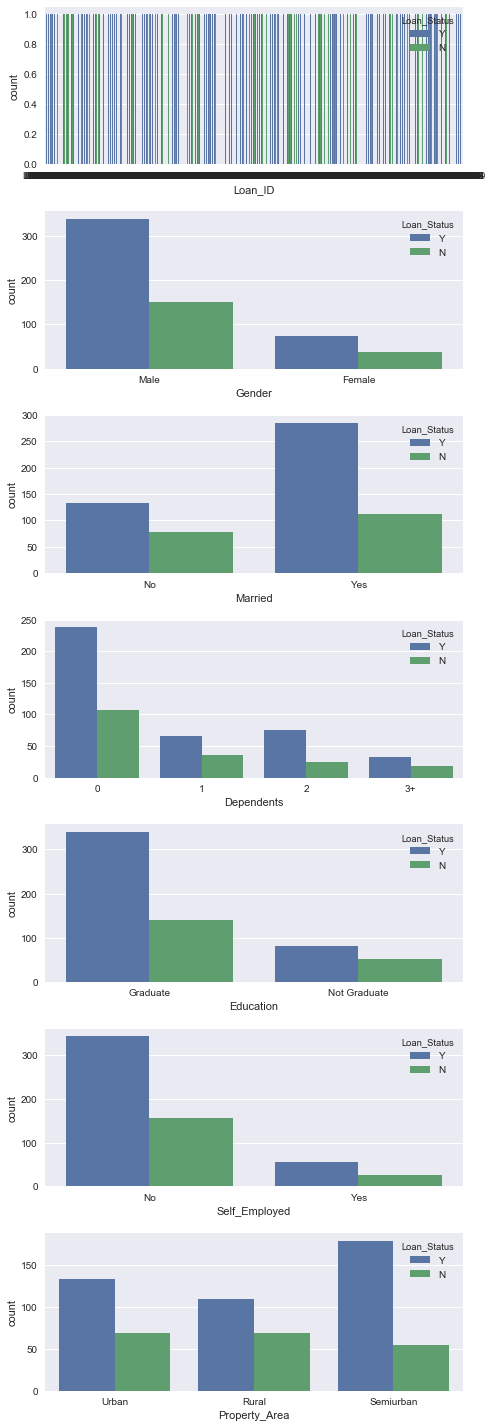

In [14]:
plt.tight_layout()
plt.show()

## Missing Value Treatment

In [15]:
(train.isnull()).describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614,614,614,614,614,614
unique,1,2,2,2,1,2,1,1,2,2,2,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,614,601,611,599,614,582,614,614,592,600,564,614,614


In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#Impute Gender with mode
train.Gender.fillna(train.Gender.mode()[0], inplace=True)

#Impute Marital status with mode
train.Married.fillna(train.Married.mode()[0], inplace=True)

#Impute Depenedents with mode
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True)

#Impute Self_Employeed with mode
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)

#Impute Loan Ammount by mean
train.LoanAmount.fillna(train.LoanAmount.mean(), inplace=True)

#Impute Loan_Amount_Term by mode
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0], inplace=True)

#Impute Credit_History with mode
train.Credit_History.fillna(train.Credit_History.mode()[0], inplace=True)

## Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

#LE gender, dependents, self_employed
train.Gender = labelencoder.fit_transform(train.Gender)
train.Dependents = labelencoder.fit_transform(train.Dependents)
# train.Property_Area = labelencoder.fit_transform(train.Property_Area)
train.Education = labelencoder.fit_transform(train.Education)
# train.Self_Employed = labelencoder.fit_transform(train.Self_Employed)

### LoanAmount Distribution

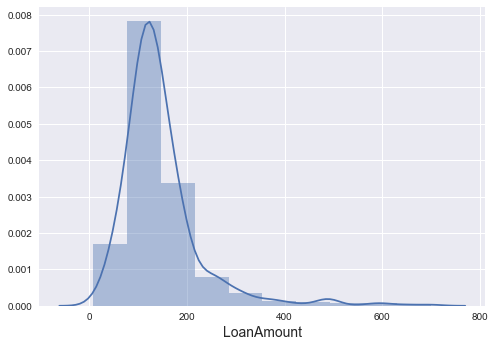

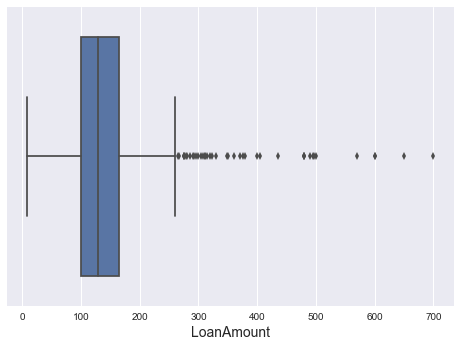

In [19]:
import seaborn as sns

sns.distplot(train.LoanAmount, bins=10)
plt.xlabel('LoanAmount', size=14)
plt.show()

sns.boxplot(train.LoanAmount)
plt.xlabel('LoanAmount', size=14)
plt.show()

## One Hot Encoding

In [20]:
# dummies = pd.get_dummies(train.Gender, prefix='Gender')
# train = pd.concat([train, dummies], axis=1)
# train.drop('Gender', inplace=True, axis=1)

## Setting Correct Dtypes

In [21]:
# Setting Dependents and Credit history as categorical
train.Dependents = train.Dependents.astype(np.object)
train.Gender = train.Gender.astype(np.object)
# train.Property_Area = train.Property_Area.astype(np.object)
train.Education = train.Education.astype(np.object)
# train.Self_Employed = train.Self_Employed.astype(np.object)
train.Credit_History = train.Credit_History.astype(np.object)

In [22]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',\
            'Loan_Amount_Term', 'Gender', 'Dependents'] 

## Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

rfmodel = RandomForestClassifier(n_jobs = -1, max_depth=8, n_estimators=100, oob_score=True)
rfmodel = rfmodel.fit(train[features],train.Loan_Status)

cross = cross_val_score(rfmodel, train[features], train.Loan_Status, cv=10)
print 'mean:',np.mean(cross),'sd:',np.sqrt(np.var(cross))
print cross

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


mean: 0.8012490242 sd: 0.0433766876512
[ 0.79365079  0.82539683  0.7704918   0.72131148  0.78688525  0.78688525
  0.8852459   0.83606557  0.7704918   0.83606557]


In [24]:
featimp = pd.Series(rfmodel.feature_importances_, features)
featimp.sort_values(ascending=False, inplace=True)

## GBM Model

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# features.append('Education')

gbmodel = GradientBoostingClassifier(max_features=0.1, max_depth=2, min_samples_leaf=0.05,\
                        subsample=0.8,n_estimators=100, learning_rate=0.05, min_samples_split=30)
gbmodel = gbmodel.fit(train[features], train.Loan_Status)


In [26]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(gbmodel, train[features], train.Loan_Status, cv = 10)

print score
print 'mean:',np.mean(score),'sd:',np.sqrt(np.var(score))
print 'gbm score function:',gbmodel.score(train[features], train.Loan_Status)

[ 0.79365079  0.82539683  0.78688525  0.75409836  0.78688525  0.78688525
  0.86885246  0.85245902  0.80327869  0.83606557]
mean: 0.809445745511 sd: 0.0334964562632
gbm score function: 0.809446254072


## Grid Search GBM Params

In [28]:
from sklearn.model_selection import GridSearchCV

params1 = {'max_depth':[2,6,8,10,12,16,20,50], 'max_features':[0.1,0.2,0.6, 0.7, 0.75, 0.8, 0.9], 'min_samples_leaf':[0.1,0.05,0.2,0.3]}
gsearch = GridSearchCV(estimator=GradientBoostingClassifier(max_features=0.1, max_depth=2, min_samples_leaf=0.05,\
                        subsample=0.8,\
                        n_estimators=100, learning_rate=0.05, min_samples_split=30),\
                        n_jobs=-1, cv=10, param_grid=params1)
gsearch = gsearch.fit(train[features], train.Loan_Status)

In [29]:
print 'best_features', gsearch.best_params_
print 'best score', gsearch.best_score_

best_features {'max_features': 0.1, 'max_depth': 2, 'min_samples_leaf': 0.05}
best score 0.809446254072


## Feature Importances

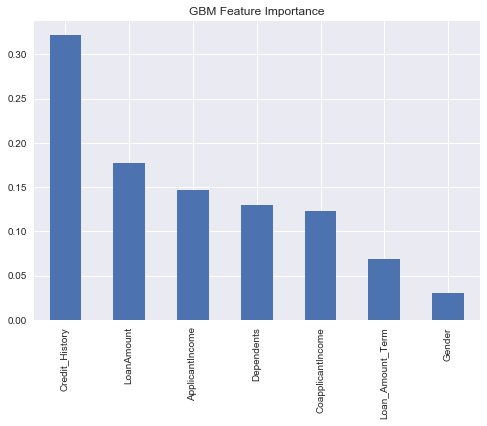

In [30]:
gbmfeat = (pd.Series(gbmodel.feature_importances_, features)).sort_values(ascending=False)
gbmfeat.plot(kind='bar', title='GBM Feature Importance')
plt.show()

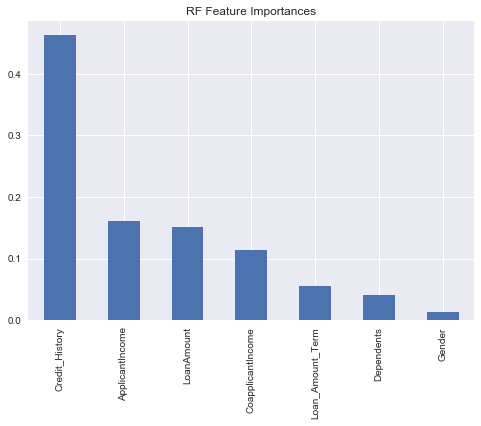

In [31]:
featimp.plot(kind = 'bar', title = 'RF Feature Importances')
plt.show()

## Original vs Predicted Values 

In [32]:
df = pd.DataFrame({'Original':train.Loan_Status, 'Predicted':gbpred})
sns.distplot(labelencoder.fit_transform(df.Original), hist=False, color='steelblue')
sns.distplot(labelencoder.fit_transform(df.Predicted), hist=False, color='orange')
plt.xlabel('Original vs Predicted Values', size=14)
topbar = plt.Rectangle((0,0),1,1,fc="steelblue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
plt.legend([topbar, bottombar], ['Original Values', 'Predicted Values'], loc=2, ncol = 1, prop={'size':14})
plt.show()

NameError: name 'gbpred' is not defined

## To-Do

 - catboost
 - Read about Loan and make new features
 - Sunil Sir's said features
 - xgboost